## E-I balanced network
Based on <a href="http://www.cell.com/neuron/fulltext/S0896-6273(17)30417-8?_returnURL=http%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0896627317304178%3Fshowall%3Dtrue"paper>this</a> paper by Denev and Colleagues. The problem with Deneve's approach is that there approach can't be generalized to non-linear dynamics and some of their synaptic weights feature instantaneous communication which is not biologically plausible.

In [112]:
import nengo
from nengo.utils.matplotlib import rasterplot
import nengo_gui
from nengo_gui.ipython import IPythonViz

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("paper")

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['legend.fontsize'] = 15

In [143]:
model = nengo.Network()
with model:
    
    def lin_func(x):
        return x+0.5
    
    tau = 0.03 #0.1
    stim = nengo.Node(output=np.sin)
    answer = nengo.Node(size_in=1)
    nengo.Connection(stim, answer, function=lin_func)
    
    test = nengo.Ensemble(100, 1, radius=2)
    nengo.Connection(stim, test, function=lin_func)


    test_auto = nengo.Ensemble(100, 1, radius=2)
    nengo.Connection(stim, test_auto, synapse=tau)
    nengo.Connection(test_auto, test_auto, transform=-1, synapse=tau)  # fast corrective loop - no filtering
    nengo.Connection(test_auto, test_auto, transform=1, synapse=tau, function=lin_func)  # slow predictive loop -
                                                                                        # filtered spike trains
    
    stim_p = nengo.Probe(stim, synapse=0.1)
    test_p = nengo.Probe(test, synapse=0.1)
    test_spikep = nengo.Probe(test.neurons, synapse=0.1)
    test_auto_p = nengo.Probe(test_auto, synapse=0.1)
    test_auto_spikep = nengo.Probe(test_auto.neurons, synapse=0.1)
    answer_p = nengo.Probe(answer, synapse=0.1)

sim = nengo.Simulator(model)
sim.run(12)

(0, 2)

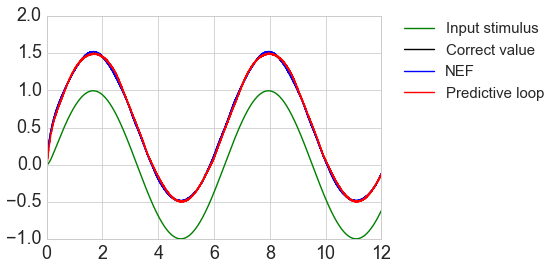

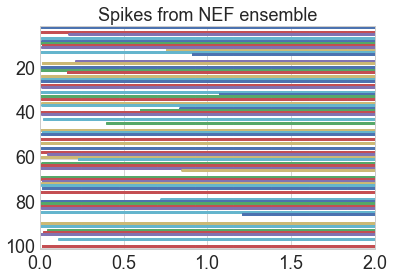

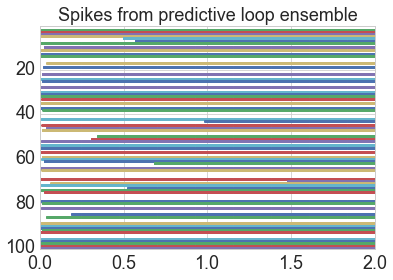

In [145]:
t = sim.trange()

plt.figure()
plt.plot(t, sim.data[stim_p], 'g')
plt.plot(t, sim.data[answer_p], 'k')
plt.plot(t, sim.data[test_p], 'b')
plt.plot(t, sim.data[test_auto_p], 'r')
plt.legend(["Input stimulus", "Correct value", "NEF","Predictive loop"] , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.figure()
rasterplot(t, sim.data[test_spikep])
plt.title("Spikes from NEF ensemble")
plt.xlim(0,2)

plt.figure()
rasterplot(t, sim.data[test_auto_spikep])
plt.title("Spikes from predictive loop ensemble")
plt.xlim(0,2)

Note that putting a synaptic time constant of 0 on the fast connection doesn't give very accurate results but putting a synaptic constant on the connection gives accurate result for linear functions. However, whats more important from our perspective is anyways just the inhibitory and excitatory connections since there is evidence of them in the cortex. This can be useful for computing linear functions in a more biologically plausible way (i.e., having E-I balance).

In [ ]:
IPythonViz(model)